In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def logNormal_path(S0, mu, sigma, T, M):
    dt = float(T) / M
    rn = np.random.standard_normal(M + 1)
    path = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rn))
    path[0] = S0
    return pd.DataFrame(path, columns=['Path'])

In [3]:
S0 = 100
mu = 0.05
sigma = 0.3
T = M = 252

In [4]:
S = logNormal_path(S0, mu, sigma, T, M)

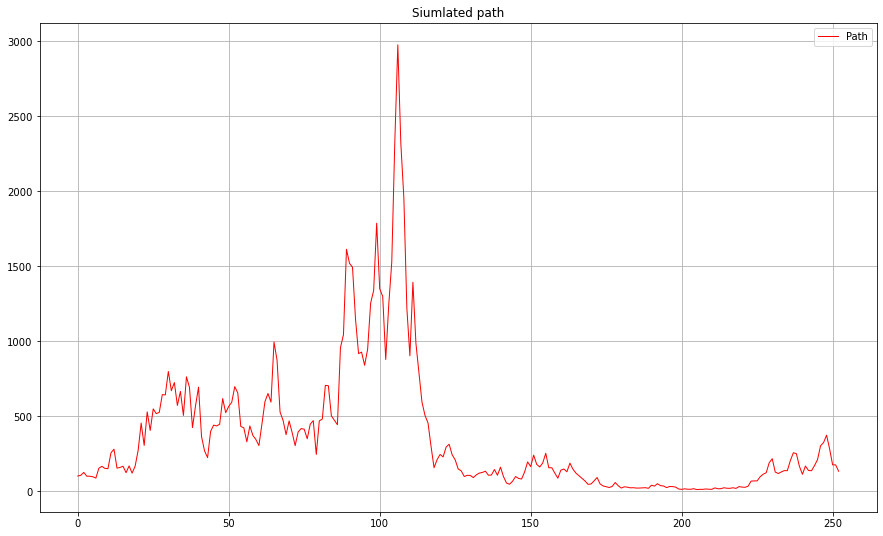

In [5]:
S.plot(figsize=(15, 9), title='Siumlated path', color = 'red', linewidth=1.0, grid=True)
plt.legend()
plt.show()

In [6]:
def dynamic_hedge(path):
    dh = (2/T) * ((path - path.shift(1))/path)
    dh.dropna(inplace = True)
    return dh.sum()['Path']

In [7]:
def static_hedge(path):
    St = path['Path'].values.tolist()
    return (2/T) * np.log(St[-1]/St[0])

In [8]:
def realized_variance(path):
    log_ret = np.log(path/path.shift(1))
    return 252 * (np.std(log_ret))**2

In [9]:
def simulations(N, S0, mu, sigma, T, M):
    PLs = []
    for i in range(N):
        S = logNormal_path(S0, mu, sigma, T, M)
        V = dynamic_hedge(S) - static_hedge(S)
        PL = realized_variance(S) - V
        PLs.append(PL)
    PLs = np.array(PLs)
    plt.figure(1)
    plt.hist(PLs, bins = 100)
    #plt.legend()
    plt.show()
    return PLs

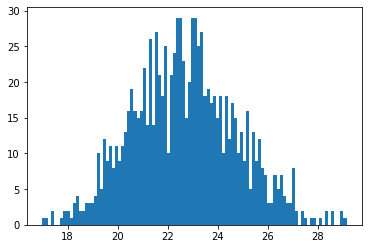

array([[25.21233537],
       [23.83705783],
       [22.38744726],
       [24.27513944],
       [20.03635066],
       [22.42730576],
       [19.46259816],
       [22.76407747],
       [21.08567743],
       [18.66373407],
       [20.59993588],
       [24.73696632],
       [22.21527065],
       [24.14488202],
       [22.43050262],
       [21.8328393 ],
       [25.02308569],
       [24.62491378],
       [22.24059205],
       [22.97259552],
       [25.35796544],
       [25.09650919],
       [22.59936922],
       [23.84035683],
       [22.62163588],
       [21.77198654],
       [23.36810397],
       [20.05293383],
       [23.10012904],
       [22.18856227],
       [23.53582947],
       [23.15863591],
       [22.51248764],
       [21.16314225],
       [24.02823564],
       [23.19444405],
       [24.03487907],
       [23.82085462],
       [21.61254483],
       [22.47108584],
       [20.5356391 ],
       [25.13243635],
       [20.64165659],
       [24.57869525],
       [20.2450288 ],
       [18

In [10]:
simulations(1000, S0, mu, sigma, T, M)